# Rational expressions
<br>

In [1]:
# We disable autosave for technical reasons.
# Replace 0 by 120 in next line to restore default.
%autosave 0

Autosave disabled


In [2]:
import awalipy # If import fails, check that 
               # Python version used as Jupyter
               # kernel matches the one
               # Awalipy was compiled with.

[Warning] The python module awalipy relies on compilation executed "on-the-fly" depending on the context (type of weights, of labels, etc.). As a result, the very first call to a given function in a given context may take up to 10 seconds. 


## Creating a RatExp

When parsing a rational expression operator precedence is : star > concatenation > union . In other words,  

- `a+(b*)` = `a+b*` != `(a+b)*`
- `a(b*)`  = `ab*` != `(ab)*`
- `a+(bc)` = `a+bc` != `(a+b)c`

In [3]:
e = awalipy.RatExp("(a+bc)c*(ab)*")
e


(a+bc)c*(ab)*

By default, the *alphabet* of a rational expression is the set of all letters appearing in it. However the alphabet may be increased artifically as follows.

In [4]:
f = awalipy.RatExp("(a+b)(c*+a)*", alphabet="abcd")
f

(a+b)(c*+a)*

---
Displaying a rational expression as a tree.

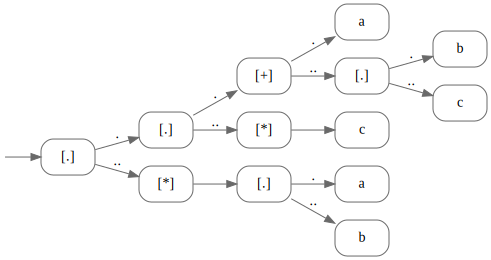

In [5]:
e.display()

## Union

In [6]:
e+f

(a+bc)c*(ab)*+(a+b)(c*+a)*

In [7]:
e+=e
e

(a+bc)c*(ab)*+(a+bc)c*(ab)*

## Concatenation

In [8]:
e^f

((a+bc)c*(ab)*+(a+bc)c*(ab)*)((a+b)(c*+a)*)

In [9]:
e^="abc*"
e

((a+bc)c*(ab)*+(a+bc)c*(ab)*)(abc*)

## Star

In [10]:
e.star()

(((a+bc)c*(ab)*+(a+bc)c*(ab)*)(abc*))*

In [11]:
e.star_here()
e

(((a+bc)c*(ab)*+(a+bc)c*(ab)*)(abc*))*

## Star normal form and star height

In [12]:
e.star_height()

2

In [13]:
e.star_normal_form()

(((a+bc)c*(ab)*+(a+bc)c*(ab)*)(abc*))*

## Expand

The method `expand` distribute union and concatenation as much as possible.

In [14]:
awalipy.RatExp("(a+bc)(d+e)(f+g)*").expand()

ad(f+g)*+ae(f+g)*+bcd(f+g)*+bce(f+g)*

## Expressions to automata

By default, awali uses the *derived term* algorithm.

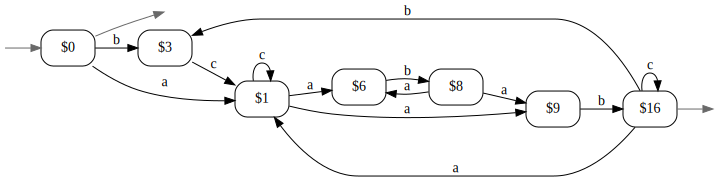

In [15]:
A = e.exp_to_aut()
A.display()

The states of `A` are indeed all the derived expressions of `e`. It may be displayed by setting to `True` the optional argument `history`.

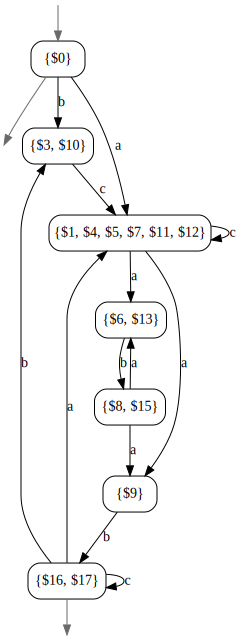

In [16]:
A.display(horizontal=False,history=True)

---
For convenience, one may give an expression to the constructor of an automaton.

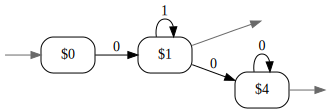

In [17]:
A = awalipy.Automaton(awalipy.RatExp("01*0*"))
A.display()

---
Awali implements multiple algorithms for transforming expressions to automata, such as *thompson* or *standard*

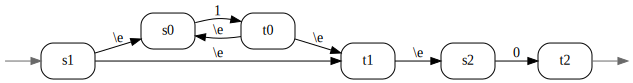

In [18]:
g = awalipy.RatExp("1*0")
g.exp_to_aut("thompson").display()

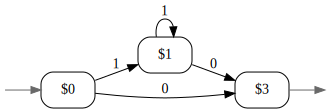

In [19]:
g.exp_to_aut("standard").display()

## Weighted rational expression

Weights must be put between "<>" and weights takes precedence over other operators:<br>

- `<-1>a*` = `(<-1>a)*` != `<-1>(a*)`
- `<-1>ab` = `(<-1>a)b` != `<-1>(ab)`
- `<-1>a+b` = `(<-1>a)+b` != `<-1>(a+b)`


The weighset must be given as a second argument at construction.

In [20]:
h = awalipy.RatExp("(<1>a*+<-1>(b*))","Z")
h

a*+<-1>(b*)

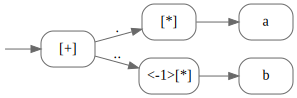

In [21]:
h.display()

<hr>
For the sake of convenience, a weight alone (ie. "<-1>") is considered as a valid representation of the word epsilon with the given weight (ie. "<-1>\\e").

In [22]:
awalipy.RatExp("<-2>","Z")

<-2>\e

<hr>
Union, concatenation and star works in the same way for weighted rational expressions.

In [23]:
i = h ^ h + ("<-1>" ^ h).star()
i

(a*+<-1>(b*))(a*+<-1>(b*)+<-1>(a*+<-1>(b*))*)

### Weighted expression to weighted automaton

For `aut_to_exp` or `standard` to work, the rational expression needs to be *valid*.
An expression is *valid* if, in every sub-expression, the weight of $\epsilon$ is well defined.
For instance the expression *(< 2 >\\e)\** is not valid (with weightset $(\mathbb{Z},+,\times$))

In [24]:
i.is_valid()

True

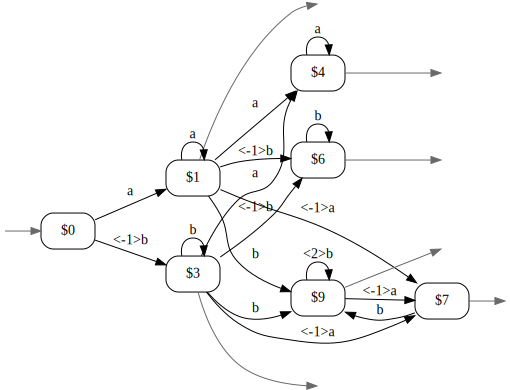

In [25]:
i.exp_to_aut().display()

---
The method `thompson()` is not suitable for weighted expressions.

Indeed, let us consider the following **valid** expression `g`: 

In [26]:
g = awalipy.RatExp("(<1>(a*)+<-1>(b*))*","Z")
g.is_valid()

True

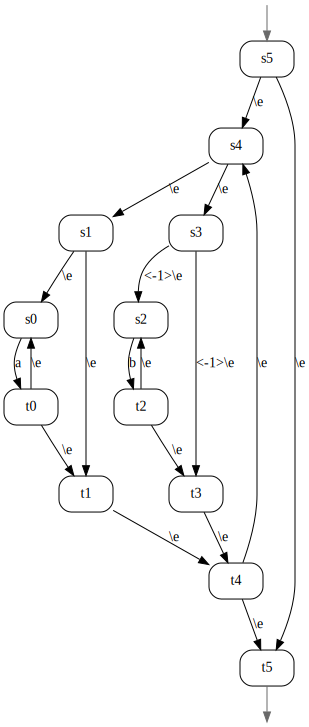

In [27]:
G = g.exp_to_aut(method="thompson")
G.display(horizontal=False)


In this case, `thompson` produces an automaton that **is not valid**.

In [28]:
G.is_valid()

False

## Other functions

The method `constant_term` gives the weight of epsilon

In [29]:
j = awalipy.RatExp("<3>((<1/4>(a*)+<1/4>(b*))*)<2>","Q")
j

<3>((<1/4>(a*)+<1/4>(b*))*)<2>

In [30]:
j.constant_term()

'12'

<hr>


In [31]:
j.get_weightset()

Q

## Decomposing RatExp's
### Kind of RatExp's

The method `exp.get_kind()` gives the top level kind of a RatExp `exp`. 
(For instance, below, the top level operator of expression `j` is the Kleene star.)

In [32]:
j.get_kind()

STAR~5

The method `get_kind()` returns an object of `RatExpKind`, which is a sort of enum. The different instances are accessible as follows.

In [33]:
awalipy.RatExp.ZERO

ZERO~0

In [34]:
awalipy.RatExp.ONE

ONE~1

In [35]:
awalipy.RatExp.ATOM

ATOM~2

In [36]:
awalipy.RatExp.SUM

SUM~3

In [37]:
awalipy.RatExp.PROD

PROD~4

In [38]:
awalipy.RatExp.STAR

STAR~5

The list of all possible instances of `RatExpKind` can be accessed via `RatExpKind.instance`.

In [39]:
awalipy.RatExpKind.instances

[ZERO~0, ONE~1, ATOM~2, SUM~3, PROD~4, STAR~5]

Object of type `RatExpKind` can be converted to or built from their integer value or their string value as follows.

In [40]:
awalipy.RatExpKind.of["STAR"]

STAR~5

In [41]:
str(awalipy.RatExp.PROD)

'PROD'

In [42]:
awalipy.RatExpKind.of[2]

ATOM~2

In [43]:
int(awalipy.RatExp.ATOM)

2

### Sub-expression

The method `ratexp.children()` gives the sub-expressions of a `RatExp` `ratexp`.

In [44]:
j.children()

[<1/4>(a*)+<1/4>(b*)]

In the case where the expression is a `RatExp.ATOM`, then `children()` gives the held label as string.

In [45]:
k = awalipy.RatExp('a')
k.get_kind()

ATOM~2

In [46]:
k.children()

['a']

In [47]:
l = awalipy.RatExp('<2>a','Z')
l.get_kind()

ATOM~2

In [48]:
l.children()

['a']

### Weights

The method `ratexp.weight()` gives the left and right weights of a `RatExp` `ratexp`.

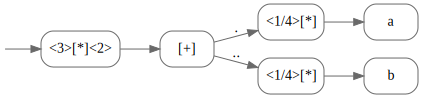

In [49]:
j.display()

In [50]:
j.weight()

['3', '2']

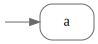

In [51]:
k.display()

In [52]:
k.weight()

['1', '1']

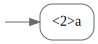

In [53]:
l.display()

In [54]:
l.weight()

['2', '1']

### Unpack a RatExp

The method `ratexp.content()` gives the full top-level content of a `RatExp` `exp`.

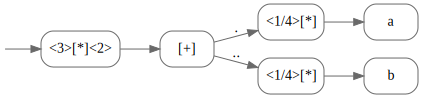

<3>((<1/4>(a*)+<1/4>(b*))*)<2>

In [55]:
j.display()
j

In [56]:
j.content()

[STAR~5, '3', <1/4>(a*)+<1/4>(b*), '2']